# Data Processing

In [249]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
os.listdir(r"C:\Users\sekalra\Desktop")

['a2302626-8e55-4b86-9219-b967d9b64099.pdf',
 'Bamboo Housing  Product Improvment.pdf',
 'Co-op_2024',
 'Copy of Pilot Audit  July 2024.xlsx',
 'Data Analysis Portfolio',
 'desktop.ini',
 'HR.csv',
 'Inject Data.csv',
 'Milestone Lessee report and dashboard setup.docx',
 'node_modules',
 'OneNote.lnk',
 'Rental Applicatin',
 'Resume.docx',
 'Slack.lnk',
 'Staff Writer',
 'Visual Studio Code.lnk',
 'Word.lnk']

In [250]:
Hr_df = pd.read_csv(r"C:\Users\sekalra\Desktop/HR.csv")

In [251]:
Hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [252]:
Hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [253]:
Hr_df.shape

(15002, 10)

In [254]:
Hr_df.isnull().any()

satisfaction_level        True
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [255]:
Hr_df.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [256]:
Hr_df.dropna(inplace=True)

In [257]:
Hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [258]:
# Reducing department categories for better modelling
Hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', 'sale'], dtype=object)

In [259]:
Hr_df['department'] = np.where(Hr_df['department'] == 'sale', 'sales', Hr_df['department'])
Hr_df['department'] = np.where(Hr_df['department'] == 'support', 'technical', Hr_df['department'])
Hr_df['department'] = np.where(Hr_df['department'] == 'IT', 'technical', Hr_df['department'])

In [260]:
Hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

# Data Exploration

In [262]:
# Number of employees who left the company
Hr_df['left'].value_counts()

left
0    11428
1     3572
Name: count, dtype: int64

In [263]:
Hr_df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440171,0.718024,3.854983,207.405375,3.875980,0.047312,0.005319


In [264]:
Hr_df.groupby('salary').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079
nme,0.700000,0.400000,2.000000,158.000000,2.000000,0.000000,1.000000,0.000000


# Data Visualization

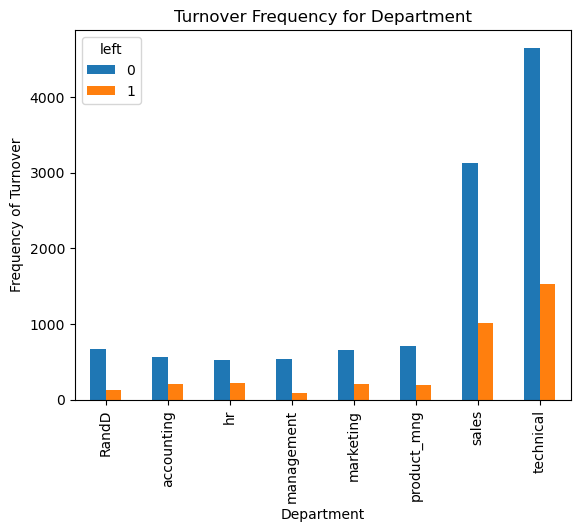

In [266]:
#Bar chart for department an employee works for and the frequency of turnover
%matplotlib inline
pd.crosstab(Hr_df.department, Hr_df.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')



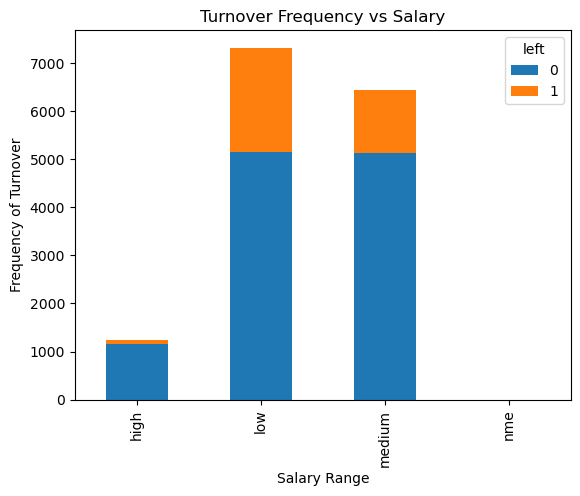

In [267]:
# Bar chart for employee salary level and frequency of turnover
pd.crosstab(Hr_df.salary, Hr_df.left).plot(kind='bar', stacked=True)
plt.title('Turnover Frequency vs Salary')
plt.xlabel('Salary Range')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_monthly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>, <Axes: >]],
      dtype=object)

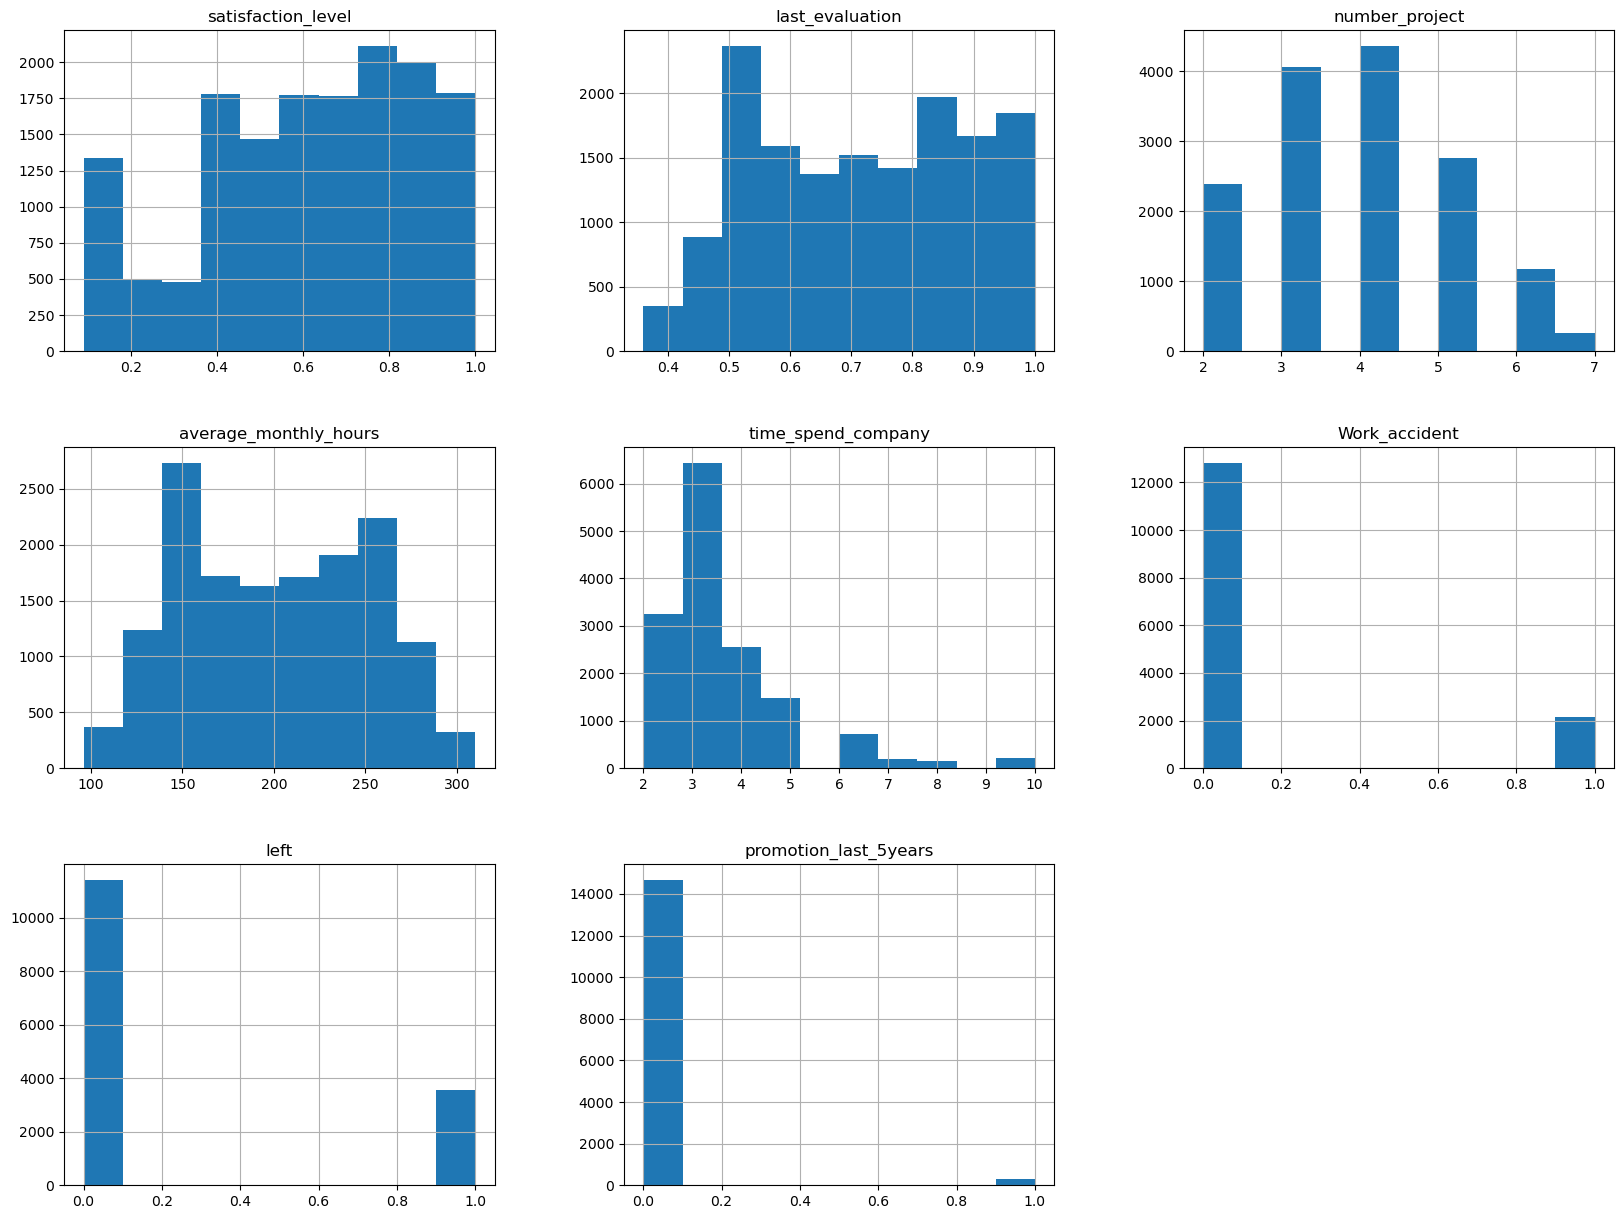

In [268]:
num_bins = 10
Hr_df.hist(bins=num_bins, figsize=(20,15))


# Creating Dummy Variables for categorical Variables


In [270]:
# Creating dummy variable for department column
cat_list1 = pd.get_dummies(Hr_df['department'], prefix='Department')
hr1=Hr_df.join(cat_list1)
Hr_df=hr1

#Creating Dummy Variable for salary column

cat_list2 = pd.get_dummies(Hr_df['salary'], prefix='Salary')
hr2=Hr_df.join(cat_list2)
Hr_df=hr2


In [271]:
Hr_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_technical,Salary_high,Salary_low,Salary_medium,Salary_nme
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,True,False
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,True,False,False,False,True,False
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False
6,0.10,0.77,6,247,4,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False
7,0.92,0.85,5,259,5,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False
8,0.89,1.00,5,224,5,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False
9,0.42,0.53,2,142,3,0,1,0,sales,low,...,False,False,False,False,True,False,False,True,False,False


In [272]:
#Removing Actual columns after creating dummy variables for categorical variables

Hr_df.drop(Hr_df.columns[[8,9]], axis=1, inplace=True)
Hr_df.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_technical', 'Salary_high',
       'Salary_low', 'Salary_medium', 'Salary_nme'], dtype=object)

In [273]:
#Outcome variable is 'left' and all other are predictors
hr_vars=Hr_df.columns.values.tolist()
y=['left']
x=[i for i in hr_vars if i not in y]
print(y)
print(x)

['left']
['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_technical', 'Salary_high', 'Salary_low', 'Salary_medium', 'Salary_nme']


# Feature Selection

In [275]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [276]:
model = LogisticRegression()
rfe = RFE(model , n_features_to_select=10)
rfe = rfe.fit(Hr_df[x], Hr_df[y])
print(rfe.support_)
print(rfe.ranking_)


C:\Users\sekalra\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sekalra\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sekalra\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False False]
[ 1  1  3 10  1  1  1  1  6  1  1  7  9  8  5  1  1  2  4]


C:\Users\sekalra\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [277]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'Department_RandD', 'Department_hr', 'Department_management', 'Salary_high', 'Salary_low'] 
X=Hr_df[cols]
y=Hr_df['left']


# Logistic Regression Model

In [279]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

model = LogisticRegression()
Log_reg = model.fit(X_train, y_train)

# Checking the accuracy of the model
model.score(X_test, y_test)

0.7657777777777778

# Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

# Checking the accuracy of the model
rf.score(X_test, y_test)

0.9788888888888889

# Support Vector Machine

In [283]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

# Checking the accuracy of the model
svm.score(X_test, y_test)

0.9117777777777778

# Cross Validation

In [285]:
# Utilizing 10 Fold Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [286]:
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring= 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

#Calculating average accuracy
results.mean()


0.980952380952381

# The ROC Curve

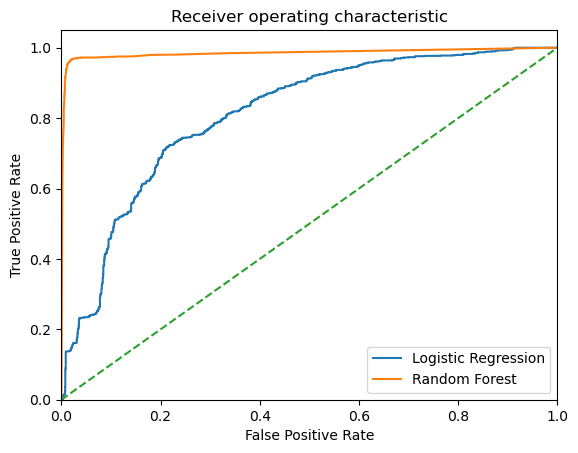

In [367]:
 
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0,1], [0,1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


# Feature Importance for Random Forest Model

In [328]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index]*100)))

promotion_last_5years-0.19%
department_management-0.23%
department_hr-0.27%
department_RandD-0.32%
salary_high-0.74%
salary_low-1.22%
Work_accident-1.46%
last_evaluation-18.74%
time_spend_company-26.09%
satisfaction_level-50.75%
